In [99]:
import sys
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

gas = ct.Solution('gri30.yaml')
fuel_species = 'C3H8'
gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')

T_array = np.arange(1000, 2000,10)
p_array = np.arange(0, 100, 1)

T_explosion = []
p_explosion = []
T_first_explosion = []
p_first_explosion = []

for T_value in T_array:
    first_exploded = False  # Flag to check if an explosion has occurred for this T_value

    for p_value in p_array:
        T_initial = T_value
        gas.TP = T_value, p_value
        r = ct.IdealGasConstPressureReactor(gas)
        sim = ct.ReactorNet([r])
        time = 0.0
        ntimes = 1000

        for n in range(ntimes):
            time += 1e-05
            sim.advance(time)

            # Check if an explosion occurs
            if np.abs(T_initial - gas.T) > 1:
                # Store the first explosion point only
                if not first_exploded:  # Corrected variable name
                    T_first_explosion.append(T_value)  # Store the temperature for the first explosion
                    p_first_explosion.append(p_value)   # Store the pressure for the first explosion
                    first_exploded = True  # Mark that the first explosion has occurred

                T_explosion.append(T_value)
                p_explosion.append(p_value)
                break  



In [104]:
T_first_explosion

[1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


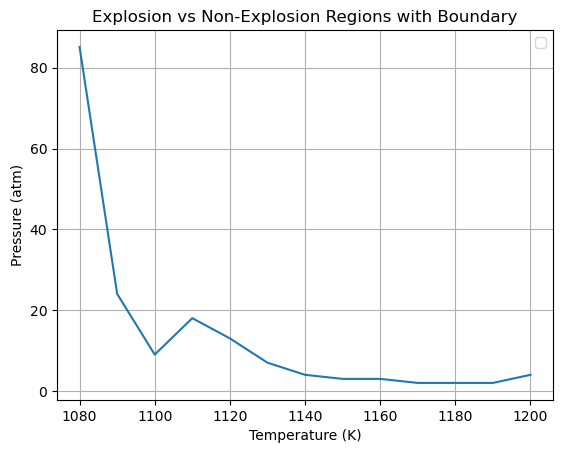

In [101]:
# Plot the data
plt.figure()

plt.plot(T_first_explosion,p_first_explosion)

# Draw a line connecting the first explosion points


plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title('Explosion vs Non-Explosion Regions with Boundary')
#plt.text(1100,10,'Non-Explosive')
#plt.text(1500,30,'Explosive')
plt.legend()
plt.grid()
plt.show()

ii)Consider for only one case with in the explosive limit   \
let us consider 5 different cases

T=1400, P=20 atm
T=1400, P=30 atm
T=1400, P=40 atm
T=1400, P=50 atm



In [62]:
gas.TP = 1400, 20
r1 = ct.IdealGasConstPressureReactor(gas)
sim1 = ct.ReactorNet([r1])
time = 0.0
ntimes = 1000
time = 0.0
states1 = ct.SolutionArray(gas, extra=['t'])

for n in range(ntimes):
    time += 1e-05
    sim1.advance(time)
    states1.append(r1.thermo.state, t=time*1e3)
    print('%10.3e %10.f %10.f %14.6e' % (sim1.time, r1.T,
                                          r1.thermo.P, r1.thermo.u))
    




 1.000e-05       1400         20  -3.951409e+05
 2.000e-05       1400         20  -3.951925e+05
 3.000e-05       1400         20  -3.952438e+05
 4.000e-05       1401         20  -3.952947e+05
 5.000e-05       1401         20  -3.953452e+05
 6.000e-05       1401         20  -3.953954e+05
 7.000e-05       1401         20  -3.954453e+05
 8.000e-05       1401         20  -3.954947e+05
 9.000e-05       1401         20  -3.955439e+05
 1.000e-04       1402         20  -3.955927e+05
 1.100e-04       1402         20  -3.956411e+05
 1.200e-04       1402         20  -3.956892e+05
 1.300e-04       1402         20  -3.957370e+05
 1.400e-04       1402         20  -3.957845e+05
 1.500e-04       1402         20  -3.958315e+05
 1.600e-04       1402         20  -3.958783e+05
 1.700e-04       1403         20  -3.959247e+05
 1.800e-04       1403         20  -3.959708e+05
 1.900e-04       1403         20  -3.960166e+05
 2.000e-04       1403         20  -3.960621e+05
 2.100e-04       1403         20  -3.961

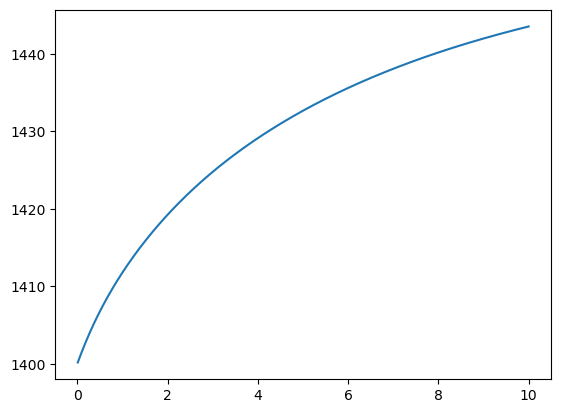

In [64]:
plt.plot(states1.t,states1.T)